# 1. What is a Clustermap in Seaborn?
A clustermap is a heatmap + hierarchical clustering combined into one visualization. 

> It shows both:

✅ A heatmap of values (like a correlation matrix or expression levels)

✅ Dendrograms that show how rows and columns are grouped together based on similarity

# 2. Why Do We Use It?
Because a clustermap does more than a heatmap:

It doesn't just show data, it organizes and groups similar rows/columns together.

It reveals hidden patterns, clusters, and structures in your data.


### 2.1. Use Cases
<table class = "styled_table">
    <tr>
        <th>Use Case</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Bioinformatics / Genetics</td>
        <td>Clustering gene expression or protein activity</td>
    <tr>
    <tr>
        <td>Market Segmentation</td>
        <td>Finding groups of similar customers or products</td>
    <tr>
    <tr>
        <td><b>Exploratory Data Analysis (EDA)</b></td>
        <td><b>Automatically group related features or time periods</b></td>
    <tr>
    <tr>
        <td><b>Machine Learning (unsupervised)</b></td>
        <td><b>Quick visual clustering (e.g., pre-k-means inspection)</b></td>
    <tr>
</table>

### 2.2. Is It Important?
Of course!

We will use especially for high-dimensional data.

<table>
    <tr>
        <th>Feature</th>
        <th>Clustermap Advantage</th>
    </tr>
    <tr>
        <td>Large Dataset</td>
        <td>Automatically finds and shows structure</td>
    <tr>
    <tr>
        <td>Many features/variables</td>
        <td>Easier to digest compared to raw heatmap</td>
    <tr>
    <tr>
        <td><b>Unlabeled data</b></td>
        <td><b>Helps discover patterns before modeling</b></td>
    <tr>
</table>


In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load dataset
file_path = r"D:\DataVisualizationForPython\datasets\orders.xlsx"

file = pd.read_excel(file_path)

if file is None:
    raise FileNotFoundError("File Path Not Found. Please, Check Your File Path")

df = pd.DataFrame(file)
df.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,Tier
0,FDN27,9.437510,Snack Foods,195.313244,OUT046,1997,Small,Tier 1,897.085562,1
1,FDW35,9.033762,Fruits and Vegetables,36.371449,OUT035,2003,Small,Tier 2,1639.303513,2
2,FDS28,20.884849,Frozen Foods,70.318167,OUT013,2008,Small,Tier 1,2664.773737,1
3,FDC09,19.976300,Snack Foods,121.723264,OUT018,2009,Medium,Tier 3,440.859593,3
4,FDX04,10.824812,Snack Foods,264.673302,OUT035,2004,Small,Tier 1,29.807098,1


In [5]:
# convert to lower case all columns
df.columns = df.columns.str.lower()
df.columns

Index(['item_id', 'item_w', 'item_type', 'item_mrp', 'outlet_id',
       'outlet_year', 'outlet_size', 'outlet_location_type', 'sales', 'tier'],
      dtype='object')

In [18]:
df_pivot = df.pivot_table(index = "outlet_year", columns="tier", values="sales")
df_pivot

# 

tier,1,2,3
outlet_year,,,
1987,NaN,2563.556624,1439.366125
1988,NaN,857.786220,3651.266895
1996,1667.377374,NaN,NaN
1997,1938.512065,1765.128145,1556.877108
1998,1935.511831,618.027674,NaN
1999,3035.712633,3977.928645,NaN
2003,NaN,1639.303513,NaN
2004,1297.336075,1428.502473,2052.793590
2008,2664.773737,2749.387043,819.314494


In [8]:
# It shouldn't be missing values
# sns.clustermap(data = df_pivot)
df_pivot.isnull().sum()

tier
1    3
2    1
3    4
dtype: int64

In [16]:
# fillna or drop
df['sales'] = df['sales'].fillna(df.groupby('tier')['sales'].transform('mean'))
df.isnull().sum()


item_id                 0
item_w                  0
item_type               0
item_mrp                0
outlet_id               0
outlet_year             0
outlet_size             0
outlet_location_type    0
sales                   0
tier                    0
dtype: int64

In [20]:
# fillna or drop
tier_1_col_mean = df[df['tier'] == 1]['sales'].mean() # 1831.7797126242856
tier_2_col_mean = df[df['tier'] == 2]['sales'].mean() # 1897.9531817388884
tier_3_col_mean = df[df['tier'] == 3]['sales'].mean() # 1789.980191838889

df.loc[df['tier'] == 1, 'sales'] = df.loc[df['tier'] == 1, 'sales'].fillna(tier_1_col_mean)
df.loc[df['tier'] == 2, 'sales'] = df.loc[df['tier'] == 2, 'sales'].fillna(tier_2_col_mean)
df.loc[df['tier'] == 3, 'sales'] = df.loc[df['tier'] == 3, 'sales'].fillna(tier_3_col_mean)

df.head()

,item_id,item_w,item_type,item_mrp,outlet_id,outlet_year,outlet_size,outlet_location_type,sales,tier
0,FDN27,9.437510,Snack Foods,195.313244,OUT046,1997,Small,Tier 1,897.085562,1
1,FDW35,9.033762,Fruits and Vegetables,36.371449,OUT035,2003,Small,Tier 2,1639.303513,2
2,FDS28,20.884849,Frozen Foods,70.318167,OUT013,2008,Small,Tier 1,2664.773737,1
3,FDC09,19.976300,Snack Foods,121.723264,OUT018,2009,Medium,Tier 3,440.859593,3
4,FDX04,10.824812,Snack Foods,264.673302,OUT035,2004,Small,Tier 1,29.807098,1


In [ ]:
# Changes do not affect the pivot table

df_pivot = df_pivot.fillna({
    1: tier_1_col_mean,
    2: tier_2_col_mean,
    3: tier_3_col_mean
})

df_pivot.head()

# other way: df_pivot = df_pivot.fillna(df_pivot.mean())

tier,1,2,3
outlet_year,,,
1987,1831.779713,2563.556624,1439.366125
1988,1831.779713,857.786220,3651.266895
1996,1667.377374,1897.953182,1789.980192
1997,1938.512065,1765.128145,1556.877108
1998,1935.511831,618.027674,1789.980192


<Figure size 1000x600 with 0 Axes>

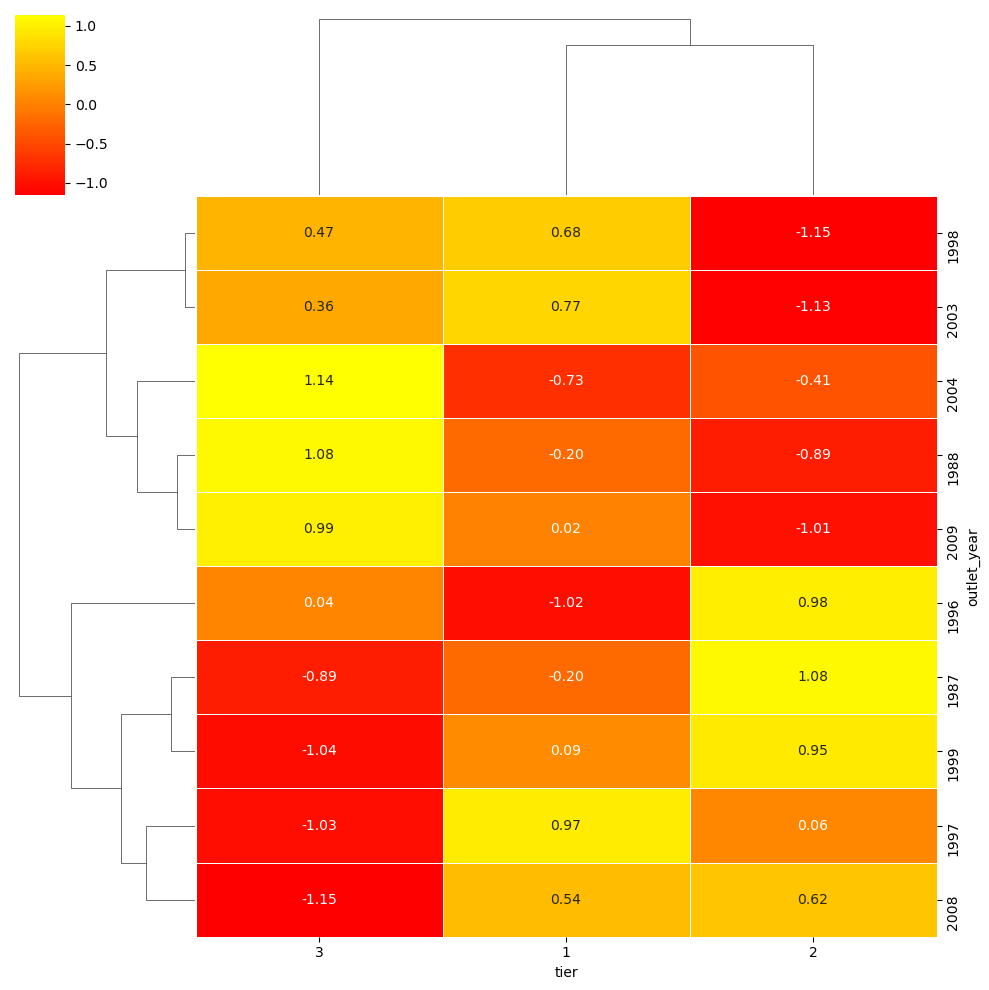

In [ ]:
plt.figure(figsize = (10,6))


sns.clustermap(data = df_pivot, 
               cmap = "autumn",
               annot = True,
               fmt = ".2f",
               # if you want to try other argument, you can remove the comment line
               # col_cluster= False,
               # row_cluster= False
               z_score= 0, #z_score = 0
               #standard_scale = 0, standart_scale = 1
               linewidth = 0.6
               )

## Argument Information:
---
standart_scale : normalize each row or column to mean 0 and std 1"

> Argument:

0 → normalize rows

1 → normalize columns

---

z_score → We can use scipy.stats.zscore() to apply z-score normalization.

Formula:  <b> (x - mean) / std </b>

> Argument:

0 → z-score across rows

1 → z-score across columns

<em><mark>Final Tip:<mark></em>

>> Don't Use Both at Once

>> Only use one of standard_scale or z_score in a single clustermap call.